<a href="https://colab.research.google.com/github/marcosvnespolo/Previsao_Inadimplencia/blob/main/Previs%C3%A3o_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o Projeto

Uma empresa de cartão de crédito forneceu um dataset que inclui dados financeiros e demográficos de uma amostra de 30.000 titulares de contas. Os dados estão apresentados em nível conta de crédio, ou seja, cada linha do dataset representa uma conta de um cliente distinto.
O objetivo do projeto é desenvolver um modelo que preveja se uma conta ficará inadimplente no próximo mês, de acordo com dados demográficos e históricos.

Os dados já foram preparados e estão disponíveis na pasta do projeto.

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Projetos Portfólio/Projetos DS com Python/Projeto 1/default_of_credit_card_clients__courseware_version_1_21_19.xls')

# 1. Inspecionando os Dados

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Aparentemente a coluna ID apresenta o nome de cada cliente na base de dados, porém, podemos confirmar esta informação através do método .nunique()

In [ ]:
df['ID'].nunique()


29687

O número de ID's únicos é inferior ao número de linhas, desta forma, o ID não é um identificador único, como sugerido anteriormente, sabemos então que há alguma duplicação de ID's.

Porém, quantos ID's estão duplicados? É possível começar a responder essa pergunta através do método .value_counts().

In [ ]:
contagem_id = df['ID'].value_counts()

In [ ]:
contagem_id.head(10)

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
2a793ecf-05c6    2
75938fec-e5ec    2
7be61027-a493    2
a3a5c0fc-fdd6    2
b44b81b2-7789    2
Name: ID, dtype: int64

Podemos utilizar novamente o método .value_counts() para identificar quantos valores são únicos ou duplicados.

In [ ]:
contagem_id.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# 2. Examinando ID's duplicados

No passo anterior, foi observado que os ID's duplicados não aparecem mais do que duas vezes, utilizarei esta informação para encontrar e avaliá-los

In [ ]:
# Visualizando os 15 primeiros ID's duplicados
id_duplicados = contagem_id == 2
id_duplicados[0:15]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
2a793ecf-05c6    True
75938fec-e5ec    True
7be61027-a493    True
a3a5c0fc-fdd6    True
b44b81b2-7789    True
998fa9b2-b341    True
69566a6b-6156    True
4e2380e6-a8cf    True
b87bf8f3-d704    True
4f95b36b-ab10    True
Name: ID, dtype: bool

In [ ]:
in_dupl_index = contagem_id.index[id_duplicados]
in_dupl_index

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', length=313)

A series possui 313 entradas, exatamente o mesmo número obtido anteriormente.
No próximo passo, converterei a series para a forma de lista, pois este formato será útil em etapas posteriores do projeto.


In [ ]:
lista_id_dupl = list(in_dupl_index)
len(lista_id_dupl)

313

In [ ]:
# Verificando as primeiras entradas
lista_id_dupl[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [ ]:
df.loc[df['ID'].isin(lista_id_dupl[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


O que parece estar acontecendo é que os ID's duplicados possuem uma linha válida, e outra composta apenas por 0, desta forma, nas próximas etapas do projeto, será necessário encontrar uma forma de xcluir estas linhas.

# 3. Lidando com Valores Nulos

In [ ]:
df_zero = df == 0

O objetivo, a partir de agora, é criar uma nova série booleana que identifique cada linha em que todos os elementos a partir da segunda coluna (Para não considerarmos a coluna ID) são iguais a zero.

In [ ]:
linhas_zero = df_zero.iloc[:,1:].all(axis=1)

In [ ]:
sum(linhas_zero)

315

O que o resultado acima nos diz é que 315 linhas tem zeros para cada coluna, exceto a primeira. Como este número é maior que o número de ID's duplicados (313), então podemos excluir estes registros sem maiores problemas.

Isto pode ser feito utilizando o código a seguir:

In [ ]:
df_limpo = df.loc[~linhas_zero, :].copy()

O código acima retorna uma cópia dos dados que desejo manter, este é o motivo do uso do operador nógico not "~", pois desejo obter todas as observações que não tem zeros, e ":" foi utilziado para selecionar todas as colunas.

Utilizando o método .shape, verifico que o número de linhas é exatamente igual ao número de Id's únicos.

In [ ]:
df_limpo.shape

(29685, 25)

In [ ]:
df_limpo['ID'].nunique()

29685

Desta forma, conclui-se que os valores duplicados foram eliminados com sucesso, tendo em vista que o número de linhas de novo DataFram (df_limpo) é igual ao número de ID's únicos.

# 4. Exploração e Limpeza dos Dados

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

Avaliando as informações apresentadas, é possível perceber que o dataset possui 25 colunas, 29685 registros não-nulos para cada coluna, e a maioria das colunas apresenta dados do tipo inteiro, com excessão das colunas ID e PAY_1.

Já sabemos que a coluna ID é somposta por strings que apresentas os ID's de contas, mas e quanto a PAY_1? Tudo indica que esta coluna deveria ser composta por inteiros.

In [ ]:
df_limpo['PAY_1'].head(10)

0     2
1    -1
2     0
3     0
4    -1
5     0
6     0
7     0
8     0
9    -2
Name: PAY_1, dtype: object

Os dados acima são relacinados so status de pagamento da fatura mensal mais recente. Mais detalhes a respeito desta coluna podem ser encontrados no dicionários de dados presente no seguinte link:https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients.

De acordo com o dicionário de dados, a lógica para a construção desta escala é a seguinte:

- Pagamento na data correta = -1
- Pagamento com um mês de atraso = 1
- Pagamento com dois mêses de atraso = 2
- Pagamento com três meses de atraso = 3...


E assim por diante.



Sabendo disto, é interessante entender quantos clientes se encontram em cada situação descrita acima

In [ ]:
df_limpo['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

O resultado anterior revela a presença de dois valores não documentados no dicionário dae de dados: 0 e -2.

Além disso, é possível observar a presença de uma string chamada "Not available", o porque de uma das colunas ter sido importada como object anteriormente.

Por enquanto, apenas removerei os registros "Not Available" da coluna.

In [ ]:
pay_1_dados_validos = df_limpo['PAY_1'] != "Not available"
pay_1_dados_validos[0:10]

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: PAY_1, dtype: bool

Desta forma, o total de dados válidos (sem valores ausentes) é dado por:

In [ ]:
sum(pay_1_dados_validos)

26664

Desta forma, podemos criar um novo DataFrame, que possua apenas valores válidos.

In [ ]:
df_limpo2 = df_limpo.loc[pay_1_dados_validos,:].copy()

In [ ]:
df_limpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Desta forma, confirmamos, que após o tratamento realizado, o DataFrame possui a quantidade de linhas esperada.

Agora podemos converter o tipo de dados da coluna PAY_1 de object para int64 através do método .astype.

In [ ]:
df_limpo2['PAY_1'] = df_limpo2['PAY_1'].astype(int)

In [ ]:
df_limpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Aplicando novamente o métido .info, é possível perceber que a conversão foi bem sucedida, sendo que agora a coluna PAY_1 se apresenta como int64!

# 5. Exploração das variáveis

Iniciarei esta etapa do projeto através da avaliação das variáveis de limite de crédito ("LIMIT_BALL") e características etárias ("AGE") de cada cliente.

In [ ]:
import matplotlib.pyplot as plt


%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

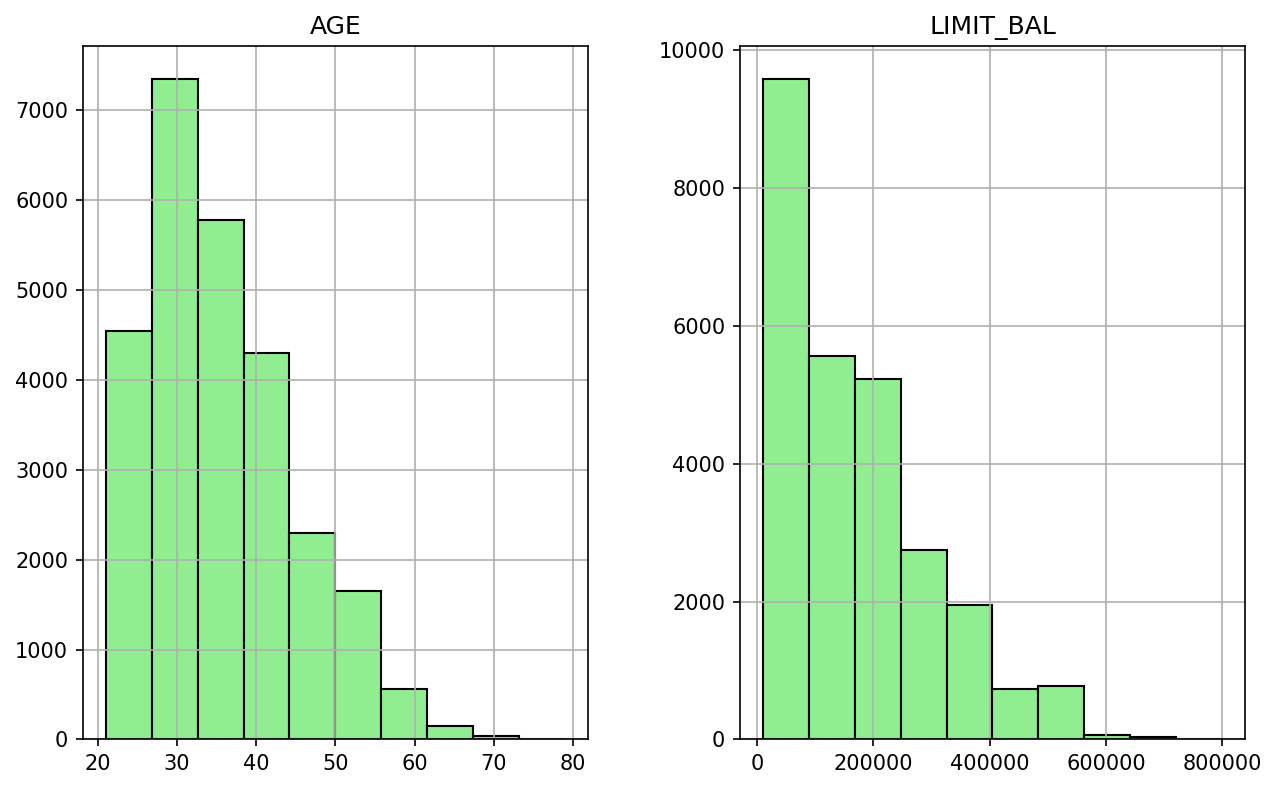

In [ ]:
import numpy as np
axes = df_limpo2[['AGE', 'LIMIT_BAL']].hist(figsize=(10, 6), color='lightgreen', edgecolor='black')


Também podemos utilizar a função describe para obter mais informações sobre as duas variáveis.

In [ ]:
df_limpo2[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


Algumas considerações a respeito das medidas estatísticas apresentadas:

- A variável AGE parece fazer sentido, com valores entre 21 e 80 anos, o que é factível para uma conta de crédito.
- O mesmo vale para LIMIT_BAL, com limites entre 10.000 e 80.000

Considerando que o dataset considera dados de Taiwan, e a moeda utilizada localmente é o novo dólar taiwanês, quando realizamos a conversão para BRL, obtemos valores de limite entre R$ 1562,00 e R$ 12.500,00, o que são valores dentro do esperado para limite de crédito!!
Fonte: https://www.google.com/search?q=novo+d%C3%B3lar+taiwan%C3%AAs&oq=novos+dolares+ta&aqs=edge.1.69i57j0i22i30.5076j0j1&sourceid=chrome&ie=UTF-8

Podemos também analisar as variáveis categóricas na tentativa de encontrar informações relevantes. Iniciando pelo nível de escoladridade, temos:

In [ ]:
df_limpo2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Aqui temos um pequeno problema, tendo em vista que os graus de instrução 0, 5, 6 não constam nas informações sobre o dataset.

No dicionário de dados, são fornecidas as seguintes informações sobre grau de escolaridade:

1: pós graduação
2: Universidade
3: Ensino Médio
4: Outros

Como os níveis 0, 5 e 6 não estão bem discriminados, e possuem participação pouco relevante nos dados, os agruparei na classe 4.

In [ ]:
df_limpo2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)


Podemos validar o procedimento acima, aplicando novamente a função .value_counts!

In [ ]:
df_limpo2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Podemos também avaliar a variável de estado civil, e tentar tirar algumas conclusões.

In [ ]:
df_limpo2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Com relação ao estado civil, encontramos um problema bastante semelhante ao nível de escolaridade, pois não possuímos informações a respeito do estado civil "0"

In [ ]:
df_limpo2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [ ]:
df_limpo2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Somando 48 observações da categoria 0 com 286 obsservações da categoria 3 vistas inicialmente, chegamos exatamente ao número 334.

# 6. Realizando a codificação de variáveis categóricas

In [ ]:
df_limpo2['EDUCATION_CAT'] = 'NONE'

In [ ]:
df_limpo2[['EDUCATION', 'EDUCATION_CAT']].head()

,EDUCATION,EDUCATION_CAT
0,2,NONE
1,2,NONE
2,2,NONE
3,2,NONE
4,2,NONE


O objetivo é adicionar a string correspondente a cada número, de acordo com o dicionário de dados. Para tal, podemos utilizar a função .map() do python, que utiliza um dicionário para estabelecer uma correspondência entre cada número e sua string.

In [ ]:
map = {1: 'Pós Graduação',
       2: 'Graduação',
       3: 'Ensino Médio',
       4: 'Outros'}

In [ ]:
df_limpo2['EDUCATION_CAT'] = df_limpo2['EDUCATION'].map(map)

In [ ]:
df_limpo2[['EDUCATION', 'EDUCATION_CAT']].head(15)

,EDUCATION,EDUCATION_CAT
0,2,Graduação
1,2,Graduação
2,2,Graduação
3,2,Graduação
4,2,Graduação
5,1,Pós Graduação
6,1,Pós Graduação
7,2,Graduação
8,3,Ensino Médio
9,3,Ensino Médio


A variável "education" em meu conjunto de dados, que categoriza o nível de educação em Pós-graduação, Graduação, Ensino Médio e Outros, originalmente estava codificada como 1, 2, 3 e 4, respectivamente. Entretanto, essa codificação numérica pode ser mal interpretada por modelos de machine learning, que poderiam erroneamente presumir uma ordem ou hierarquia nessas categorias. Para resolver essa questão, recorri ao método conhecido como one-hot encoding.

Com o one-hot encoding, cada categoria é transformada em uma característica binária independente. Por exemplo, a "Pós-graduação" passa a ser representada como [1, 0, 0, 0] e a "Graduação" como [0, 1, 0, 0], e assim por diante. Isso permite que os algoritmos de machine learning interpretem corretamente essas categorias sem confusões, aumentando a eficácia do modelo na utilização dessas informações para fazer previsões precisas.

In [ ]:
education_ohe = pd.get_dummies(df_limpo2['EDUCATION_CAT'])

In [ ]:
education_ohe.head(15)

,Ensino Médio,Graduação,Outros,Pós Graduação
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,0,1
6,0,0,0,1
7,0,1,0,0
8,1,0,0,0
9,1,0,0,0


Podemos verificar se a codificação aplicada deu certo através da função .concat() do pandas, onde podemos analisar lado a lado, a variável antiga e as novas variáveis criadas através do OHE!

In [ ]:
df_ohe = pd.concat([df_limpo2, education_ohe], axis=1)

In [ ]:
df_ohe[['EDUCATION', 'Pós Graduação','Graduação','Ensino Médio','Outros']]

,EDUCATION,Pós Graduação,Graduação,Ensino Médio,Outros
0,2,0,1,0,0
1,2,0,1,0,0
2,2,0,1,0,0
3,2,0,1,0,0
4,2,0,1,0,0
...,...,...,...,...,...
29995,3,0,0,1,0
29996,3,0,0,1,0
29997,2,0,1,0,0
29998,3,0,0,1,0


Ao que tudo indica, o objetivo esperado foi alcançado com êxito!

Feitas as devidas transformações, podemos exportar os dados par aum arquivo .CSV ou para uma planilha do Excel.


In [ ]:
df_ohe.to_csv('dados_tratados.csv', index=False)

Atribuirem à variável "df" o novo DataFrame, agora contendo dados tratados!

In [ ]:
df = pd.read_csv('/content/dados_tratados.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,Ensino Médio,Graduação,Outros,Pós Graduação
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,Graduação,0,1,0,0
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,Graduação,0,1,0,0
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,Graduação,0,1,0,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,Graduação,0,1,0,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,Graduação,0,1,0,0


In [ ]:
df.shape

(26664, 30)

Observa-se que possuímos 5 colunas a mias em relação ao DataSet contendo dados brutos, o que é exatamente o esperado após a aplicação do One Hot Encoding.

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'Ensino Médio',
       'Graduação', 'Outros', 'Pós Graduação'],
      dtype='object')

Darei continuidade à análise através da avaliação das variáveis relacionadas ao histórico financeiro.

In [ ]:
pagamentos = [ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [ ]:
df[pagamentos].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Através da análise estatística, conclui-se que o intervalo de valores é o mesmo para todas as características: -2, -1, 0 e 8.
O valor 9 referente a nove meses se atraso no pagamento, aparentemente não ocorreu nenhuma vez.

Realizarei a contagem de cada observação de forma ordenada através do código abaixo:

In [ ]:
df[pagamentos[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

A primeira vista, o que se conclui é que a graned maioria dos valores são das classes -2, -1 e 0, ou seja, contas que estavam em boa situação no mês passado.

Podemos também visualizar este comportamento de mandeira gráfica através de um histograma.

<Axes: >

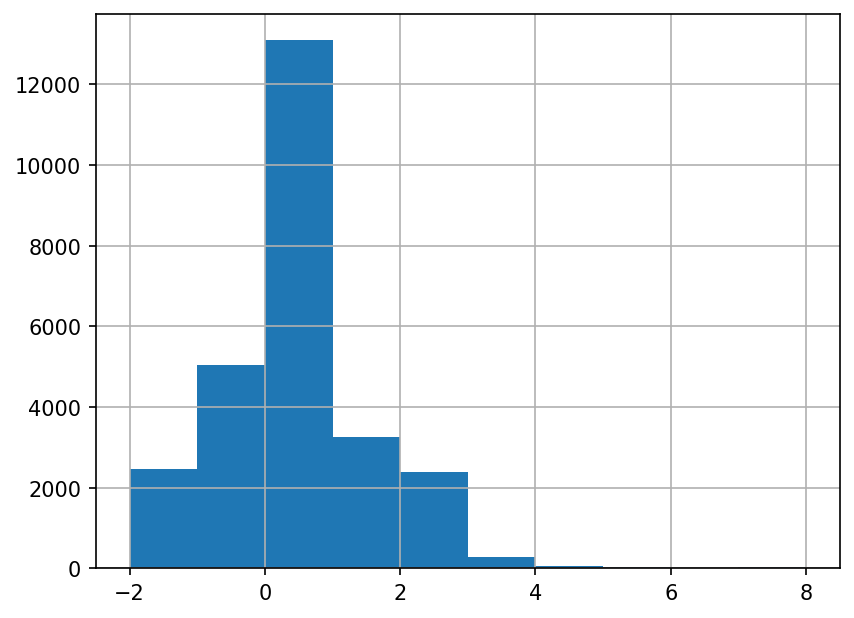

In [ ]:
df[pagamentos[0]].hist()

Adicionarei alguns incrementos para melhorar a visualização deste histograma

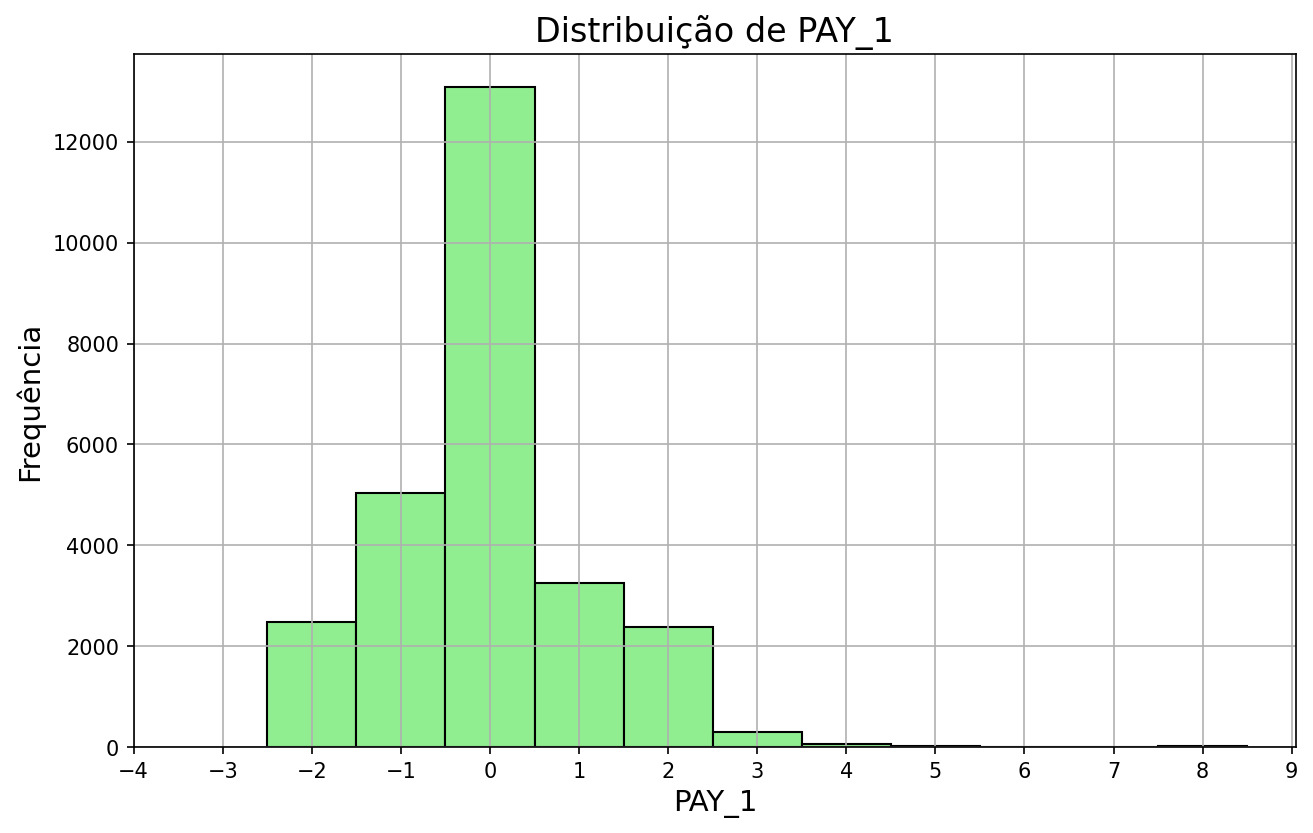

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
pay_1_bins = np.array(range(-2,10)) - 0.5 # Estratégia utilizada para centralizar os bins, pois por padrão, o matplotlib alinha a borda esquerda ao número
plt.hist(df[pagamentos[0]], bins = pay_1_bins, color='lightgreen', edgecolor='black')  # Define a quantidade de bins e cor do histograma

# Adicionando títulos e rótulos
plt.title('Distribuição de ' + pagamentos[0], fontsize=16)  # Adiciona um título ao histograma
plt.xlabel(pagamentos[0], fontsize=14)  # Rótulo para o eixo X
plt.ylabel('Frequência', fontsize=14)  # Rótulo para o eixo Y

# Definindo os incrementos do eixo X
xmin, xmax = plt.xlim()  # obtém os limites do eixo X
plt.xticks(np.arange(np.floor(xmin), np.ceil(xmax), 1))  # define os incrementos para 1


# Adicionando grid
plt.grid(True)


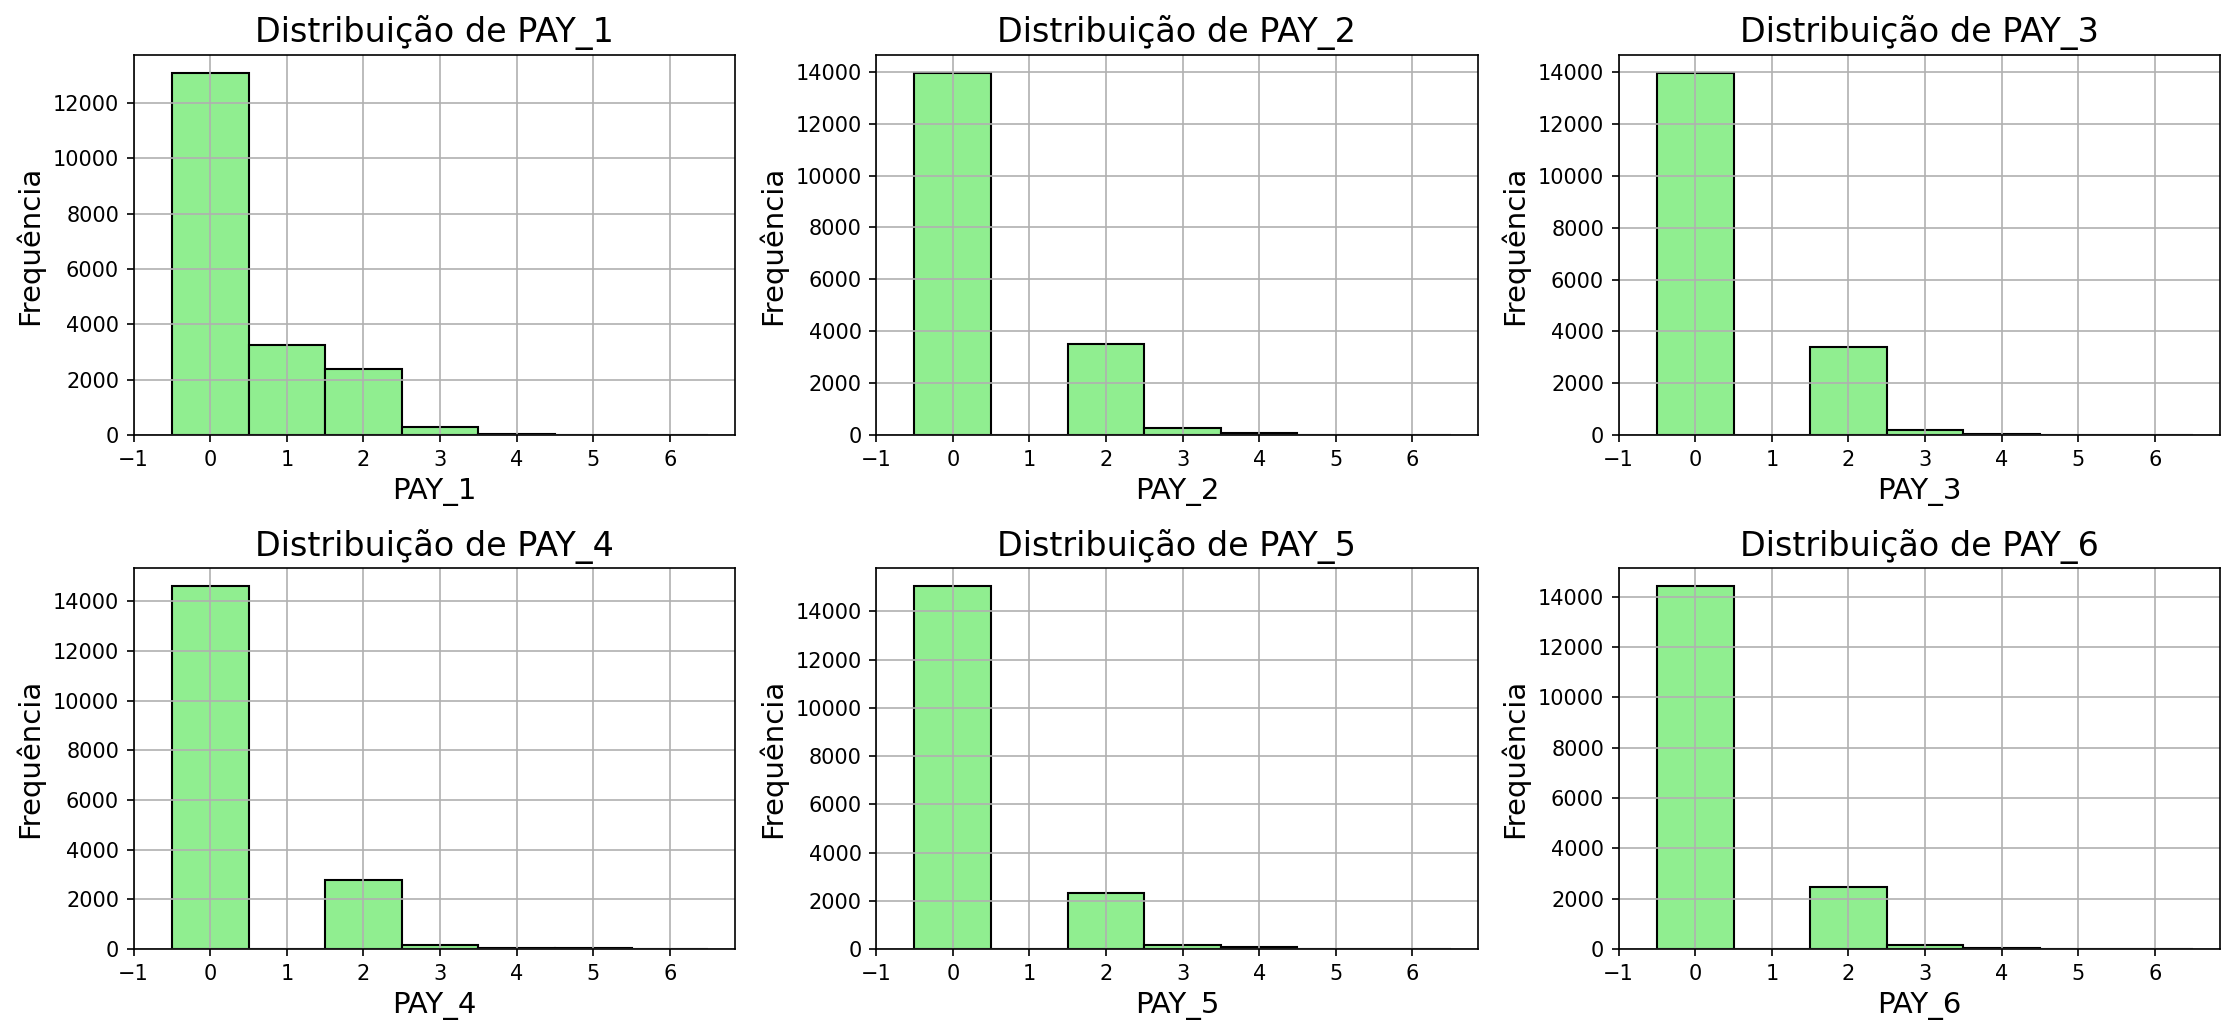

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(15, 7))  # cria 2 linhas e 3 colunas de subplots

# lista com os nomes das colunas
pagamentos = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i, ax in enumerate(axs.ravel()):  # ravel irá aplainar o array axs para facilitar a iteração
    # configuração do histograma
    pay_bins = np.array(range(0, 8)) - 0.5  # define as bordas dos bins
    ax.hist(df[pagamentos[i]], bins=pay_bins, color='lightgreen', edgecolor='black')  # plota o histograma

    # adicionando títulos e rótulos
    ax.set_title('Distribuição de ' + pagamentos[i], fontsize=16)  # adiciona um título ao histograma
    ax.set_xlabel(pagamentos[i], fontsize=14)  # rótulo para o eixo X
    ax.set_ylabel('Frequência', fontsize=14)  # rótulo para o eixo Y

    # definindo os incrementos do eixo X
    xmin, xmax = ax.get_xlim()  # obtém os limites do eixo X
    ax.set_xticks(np.arange(np.floor(xmin), np.ceil(xmax), 1))  # define os incrementos para 1

    # adicionando grid
    ax.grid(True)

plt.tight_layout()  # ajusta o layout para evitar sobreposição
plt.show()  # exibe o plot


Ao observarmos rapidamente, a representação gráfica de PAY_1 parece coerente, porém, e quanto ao restante? Para dizer com maior certeza o quão confiáveis são estas representações, devemos relembrar as descrições dos valores numéricos positivos desses atributos e o significado de cada um. Por exemplo, PAY_2 corresponde à condição de reembolso em agosto, PAY_3 refere-se ao estado de reembolso em julho e as demais regredem temporalmente. Um valor de 1 indica um atraso de um mês no pagamento, enquanto um valor de 2 indica atraso de dois meses, e assim sucessivamente. Percebeu algo estranho? Pense nos valores entre julho (PAY_3) e agosto (PAY_2). Em julho, poucas contas apresentaram um atraso de um mês no pagamento; essa coluna mal aparece no histograma. No entanto, em agosto, de repente há milhares de contas com dois meses de atraso no pagamento. Isso é incoerente: o número de contas com dois meses de atraso em um mês específico deveria ser igual ou inferior ao número de contas com um mês de atraso no mês anterior.

In [ ]:
# PAY_2 corresponde ao mês de agosto e PAY_3 corresponde ao mês de julho
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()



,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Percebe-se que os dados não fazem sentido, pois para haver um atraso de 2 meses em Agosto (PAY_2), precisaríamos de um atraso de um atraso de um mês em Julho (PAY_3), e não é o que observamos nesses dados.

Portanto, ao que tudo indica, apenas o mês mais recente de nosso status de pagamentos está correto, desta forma, apenas a variável PAY_1 é representativa de dados futuros, e poderá ser usada para o desenvolvimento do modelo de previsão de Inadimplência.

# 7. Explorando as demais variáveis financeiras

In [ ]:
valor_fatura = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
valor_pagamento = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
df[valor_fatura].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Em resumo, essas estatísticas sugerem que, em média, a quantidade da fatura de conta tende a diminuir ao longo do tempo de setembro a abril. No entanto, há uma grande variação nos valores da fatura de conta, como indicado pelos valores altos de desvio padrão e pela diferença entre os valores mínimo e máximo.

In [ ]:
df[valor_pagamento].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


Podemos observar algumas informações relevantes nas estatísticas fornecidas:

Não há valores ausentes: Todas as colunas têm a mesma contagem de 26664.

Variação dos pagamentos: As médias dos pagamentos variam de 4843.73 (PAY_AMT5) a 5881.11 (PAY_AMT2).

Grande dispersão nos pagamentos: Os desvios padrão são altos para todas as colunas, indicando uma grande variação nos valores dos pagamentos.

Alguns clientes não fizeram pagamentos: O valor mínimo é 0 para todos os pagamentos.

Possíveis outliers: A diferença entre o 75% percentil e o valor máximo é grande em todas as colunas, sugerindo a presença de outliers.

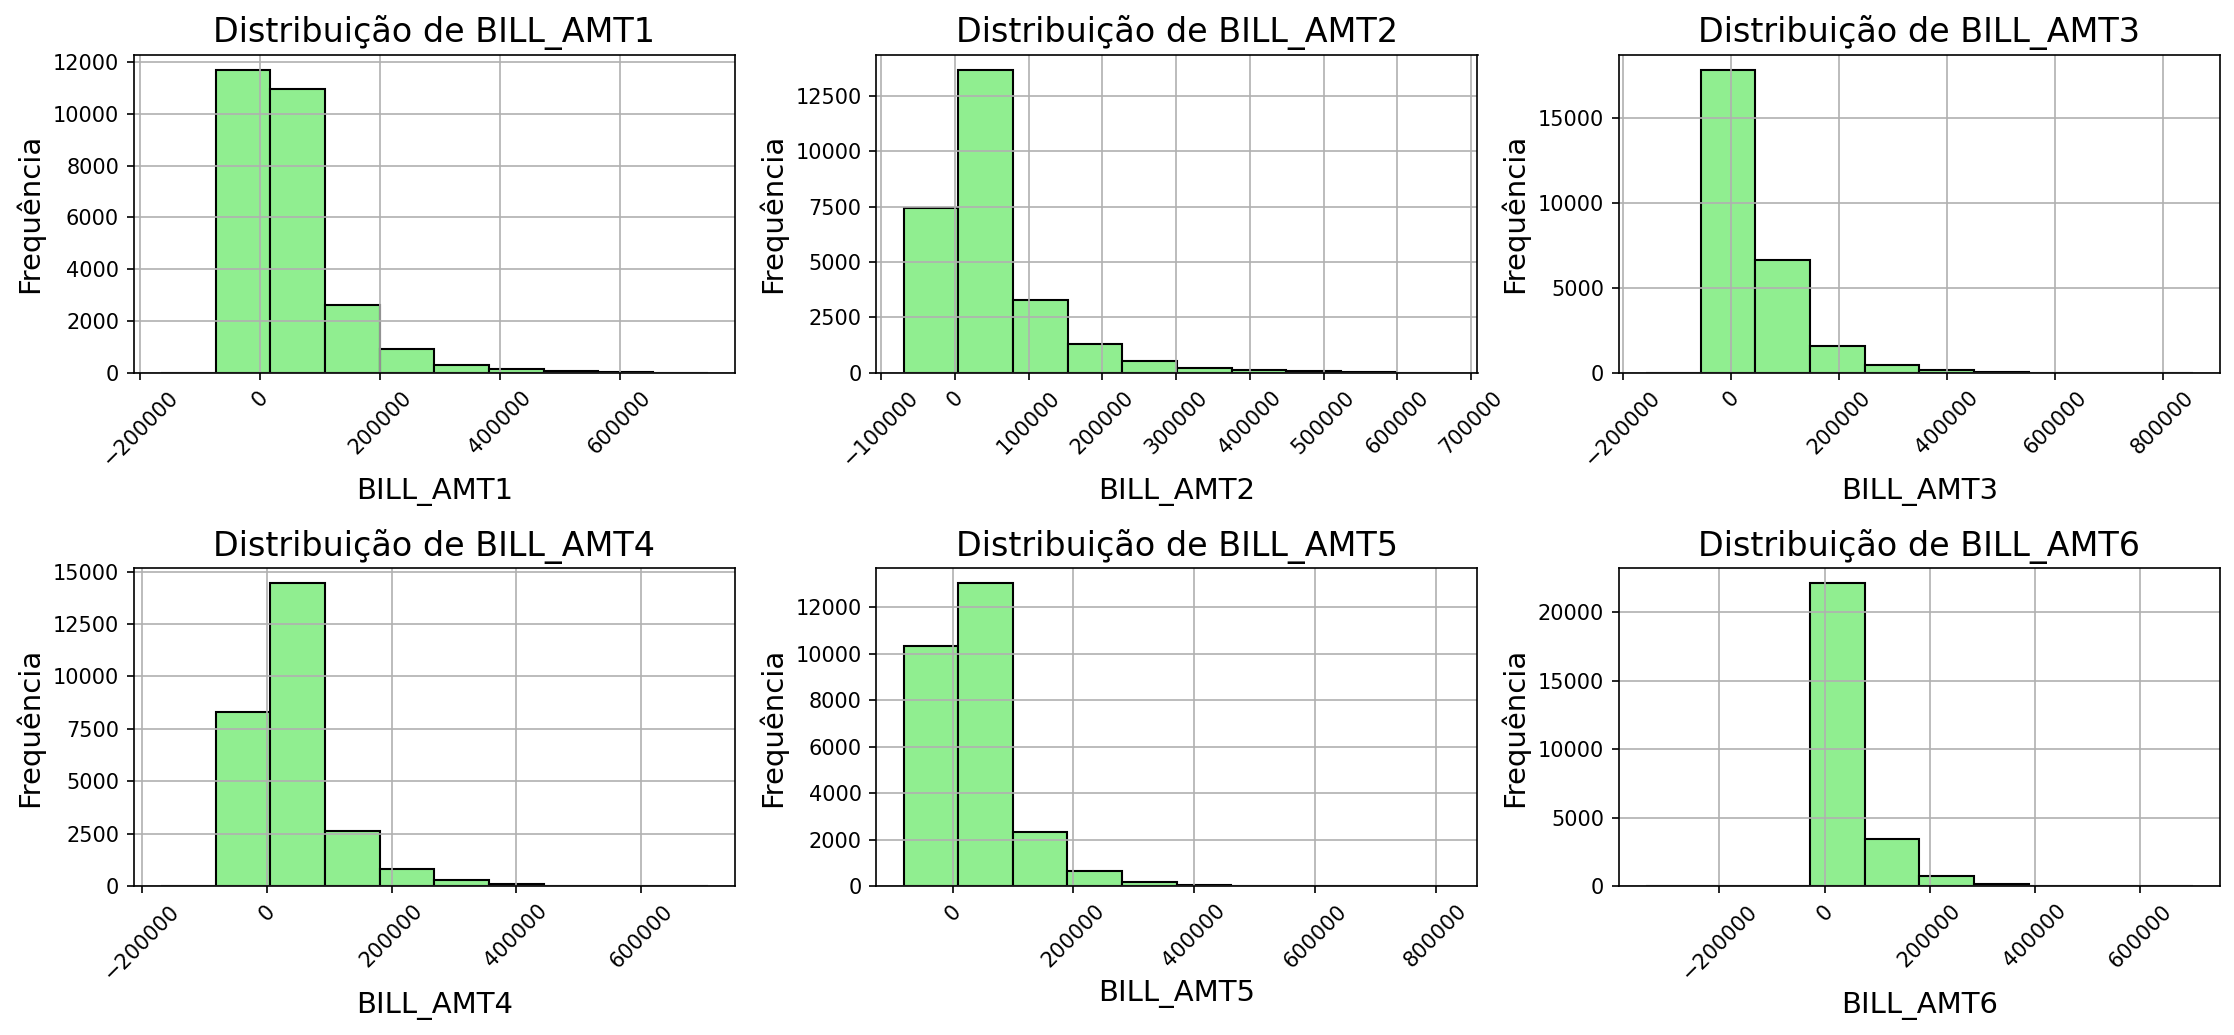

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))  # cria 2 linhas e 3 colunas de subplots

# lista com os nomes das colunas
faturas = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for i, ax in enumerate(axs.ravel()):  # ravel irá aplainar o array axs para facilitar a iteração
    # configuração do histograma
    ax.hist(df[faturas[i]], color='lightgreen', edgecolor='black')  # plota o histograma

    # adicionando títulos e rótulos
    ax.set_title('Distribuição de ' + faturas[i], fontsize=16)  # adiciona um título ao histograma
    ax.set_xlabel(faturas[i], fontsize=14)  # rótulo para o eixo X
    ax.set_ylabel('Frequência', fontsize=14)  # rótulo para o eixo Y

    # adicionando grid
    ax.grid(True)

    # rotaciona os rótulos do eixo x
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # ajusta o layout para evitar sobreposição
plt.show()  # exibe o plot

Realizarei a mesma análise para as variáveis de pagamento

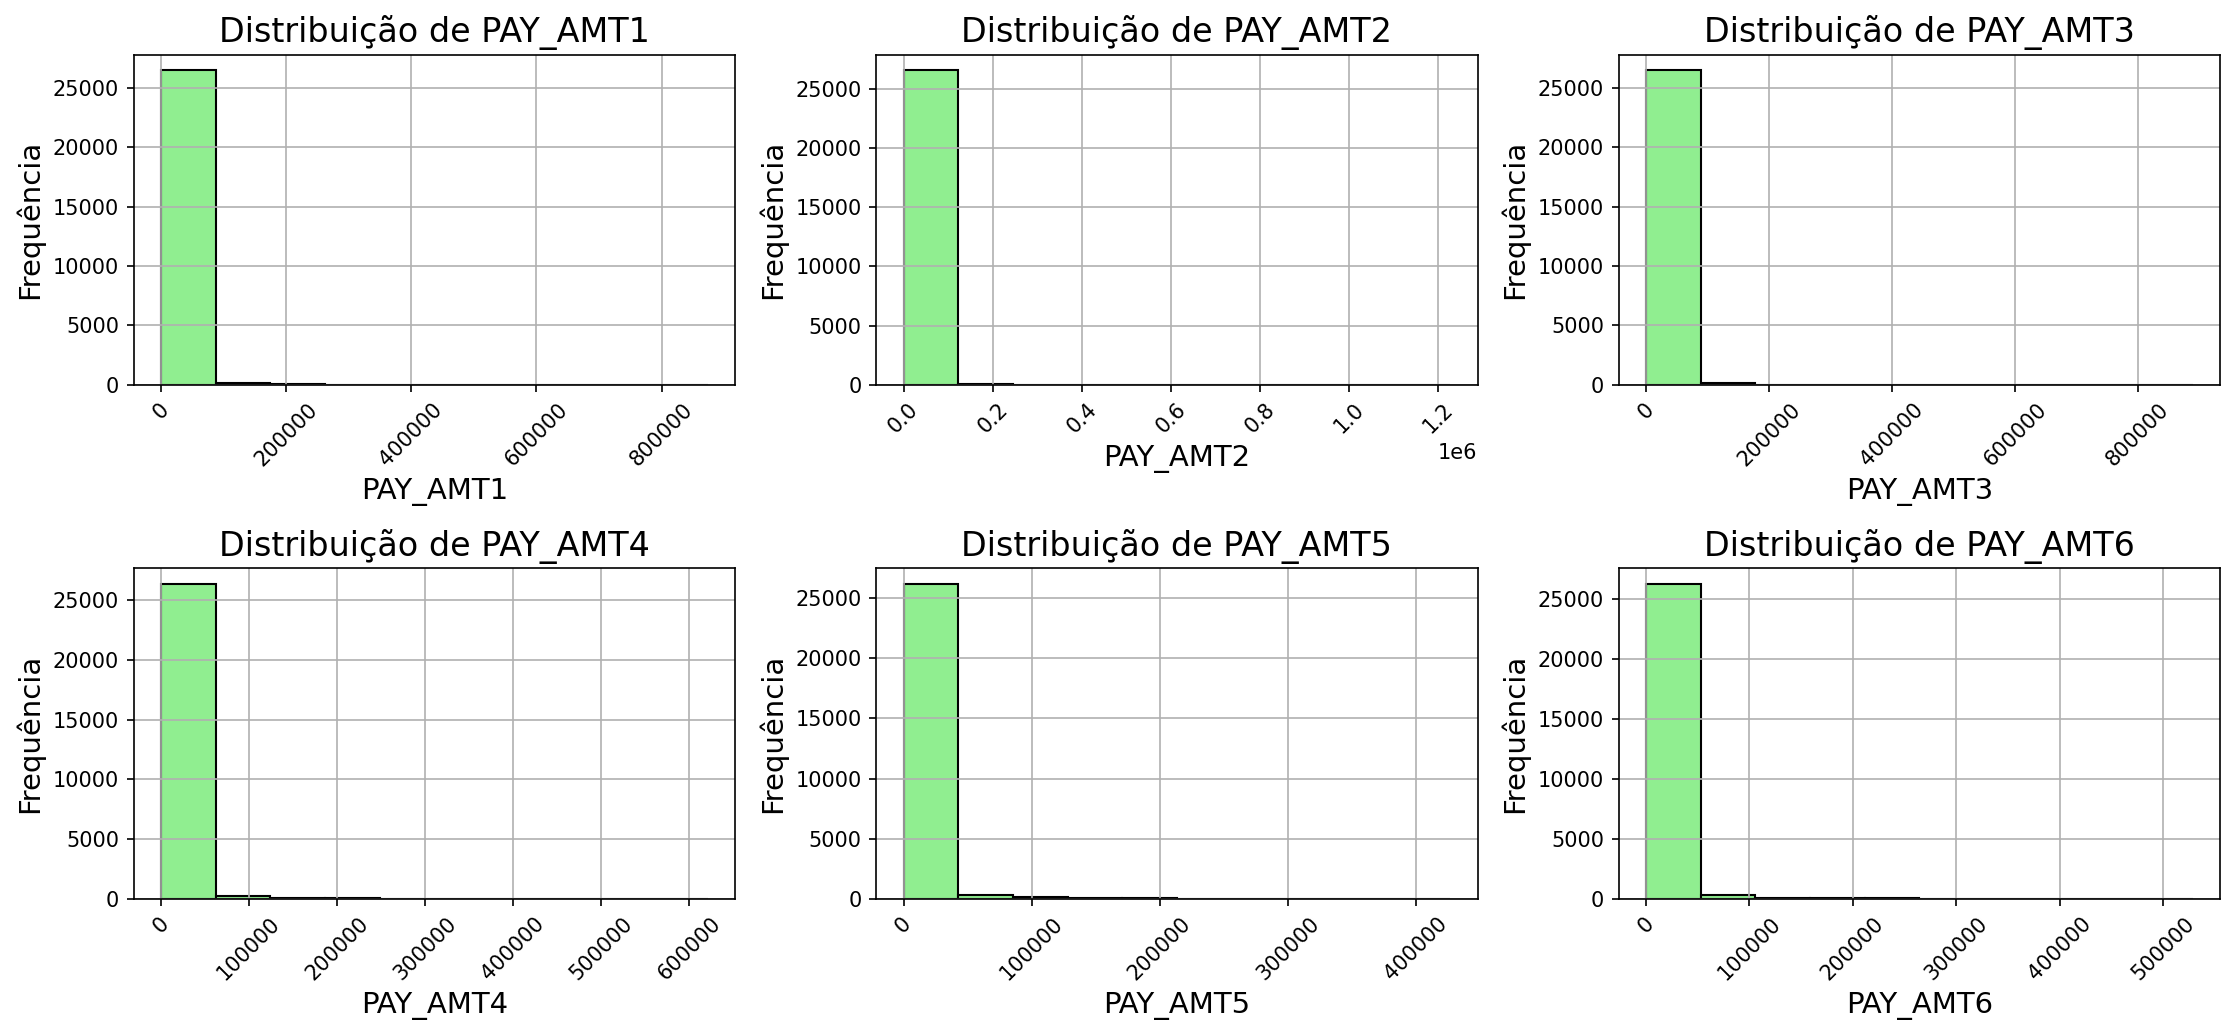

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))  # cria 2 linhas e 3 colunas de subplots

# lista com os nomes das colunas
pagamentos = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i, ax in enumerate(axs.ravel()):  # ravel irá aplainar o array axs para facilitar a iteração
    # configuração do histograma
    ax.hist(df[pagamentos[i]], color='lightgreen', edgecolor='black')  # plota o histograma

    # adicionando títulos e rótulos
    ax.set_title('Distribuição de ' + pagamentos[i], fontsize=16)  # adiciona um título ao histograma
    ax.set_xlabel(pagamentos[i], fontsize=14)  # rótulo para o eixo X
    ax.set_ylabel('Frequência', fontsize=14)  # rótulo para o eixo Y

    # adicionando grid
    ax.grid(True)

    # rotaciona os rótulos do eixo x
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # ajusta o layout para evitar sobreposição
plt.show()  # exibe o plot

Aparentemente, o eixo X da variável PAY_AMT2 foi ajustado automáticamente para notação científica, para uniformizar os eixos na mesma notação, utilizarei o seguinte códgo: ax.ticklabel_format(style='plain', axis='x', useOffset=False)

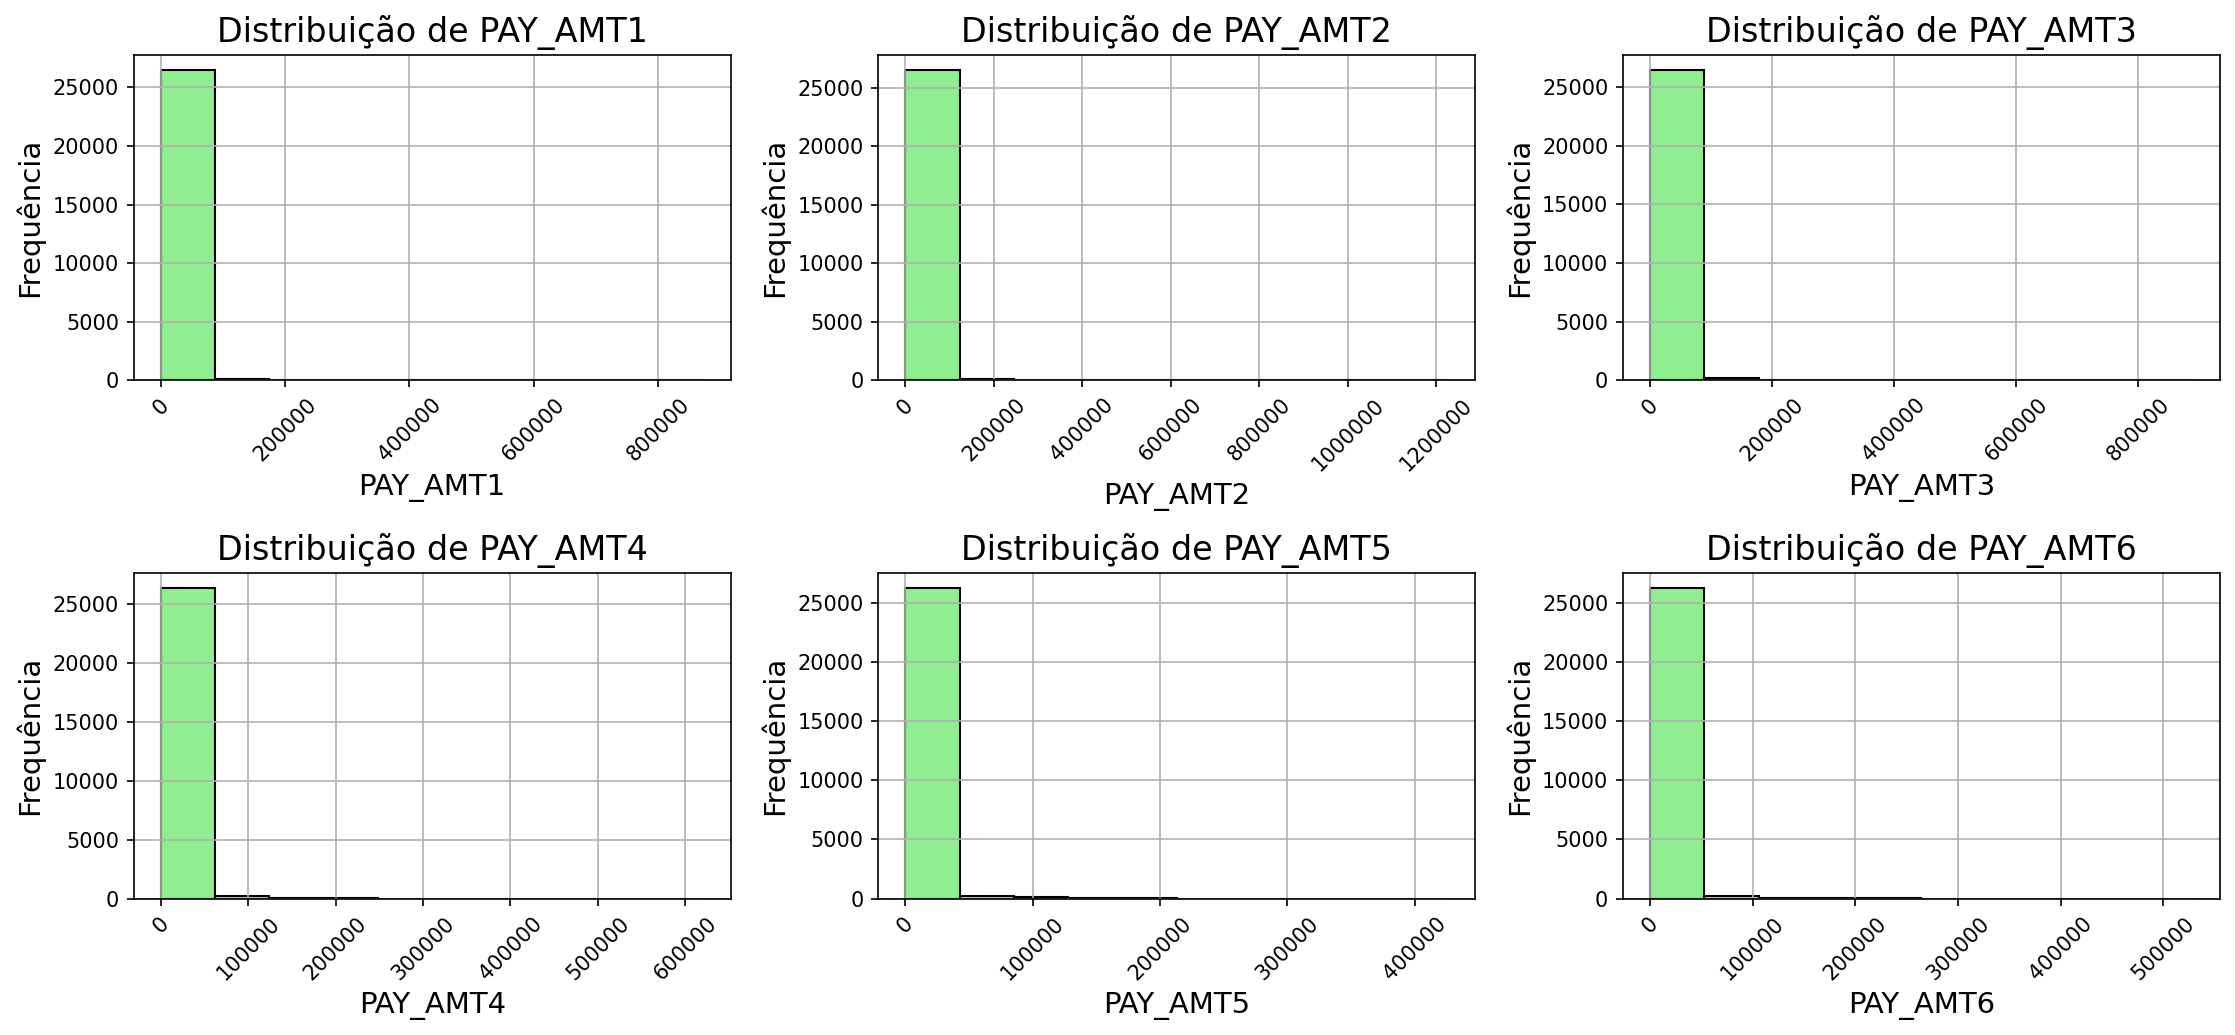

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))  # cria 2 linhas e 3 colunas de subplots

# lista com os nomes das colunas
pagamentos = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i, ax in enumerate(axs.ravel()):  # ravel irá aplainar o array axs para facilitar a iteração
    # configuração do histograma
    ax.hist(df[pagamentos[i]], color='lightgreen', edgecolor='black')  # plota o histograma

    # adicionando títulos e rótulos
    ax.set_title('Distribuição de ' + pagamentos[i], fontsize=16)  # adiciona um título ao histograma
    ax.set_xlabel(pagamentos[i], fontsize=14)  # rótulo para o eixo X
    ax.set_ylabel('Frequência', fontsize=14)  # rótulo para o eixo Y

    # adicionando grid
    ax.grid(True)

    # desativa a notação científica
    ax.ticklabel_format(style='plain', axis='x', useOffset=False)

    # rotaciona os rótulos do eixo x
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # ajusta o layout para evitar sobreposição
plt.show()  # exibe o plot


É interessante avaliar qual a quantidade de faturas sem pagamento em cada variável

In [ ]:
pagamento_zero = df[valor_pagamento] == 0
pagamento_zero

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
26659,False,False,False,False,False,False
26660,False,False,False,False,True,True
26661,True,True,False,False,False,False
26662,False,False,False,False,False,False


In [ ]:
pagamento_zero.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

Percebe-se uma distribuição bastante assimétrica nos dados, com relação aos pagamentos iguais a zero, desta forma, é interessante aplicar uma transformação logarítimica aos pagamentos diferentes de zero, para que possamos avaliar seu comportamento com maior precisão.

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

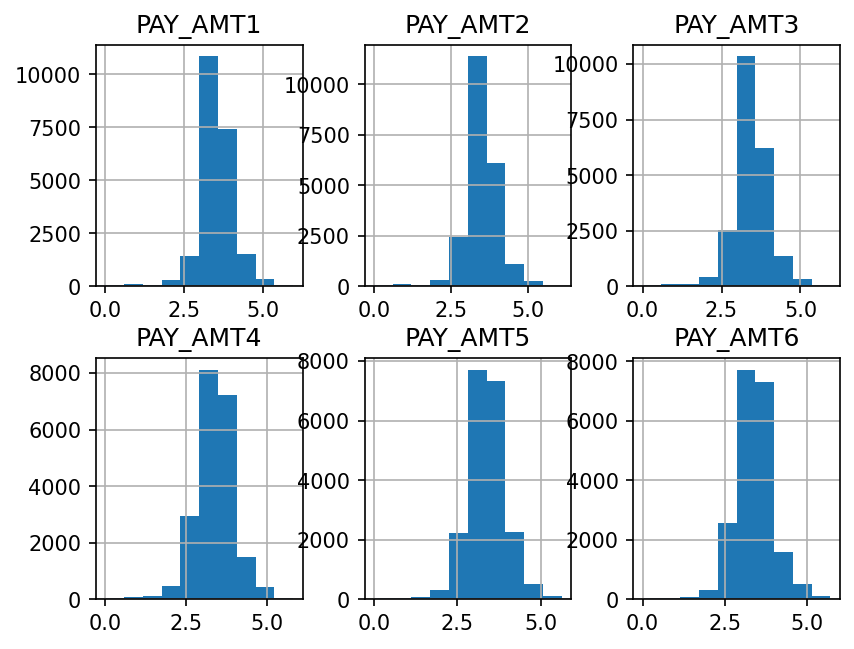

In [ ]:
df[valor_pagamento][~pagamento_zero].apply(np.log10).hist(layout=(2,3))

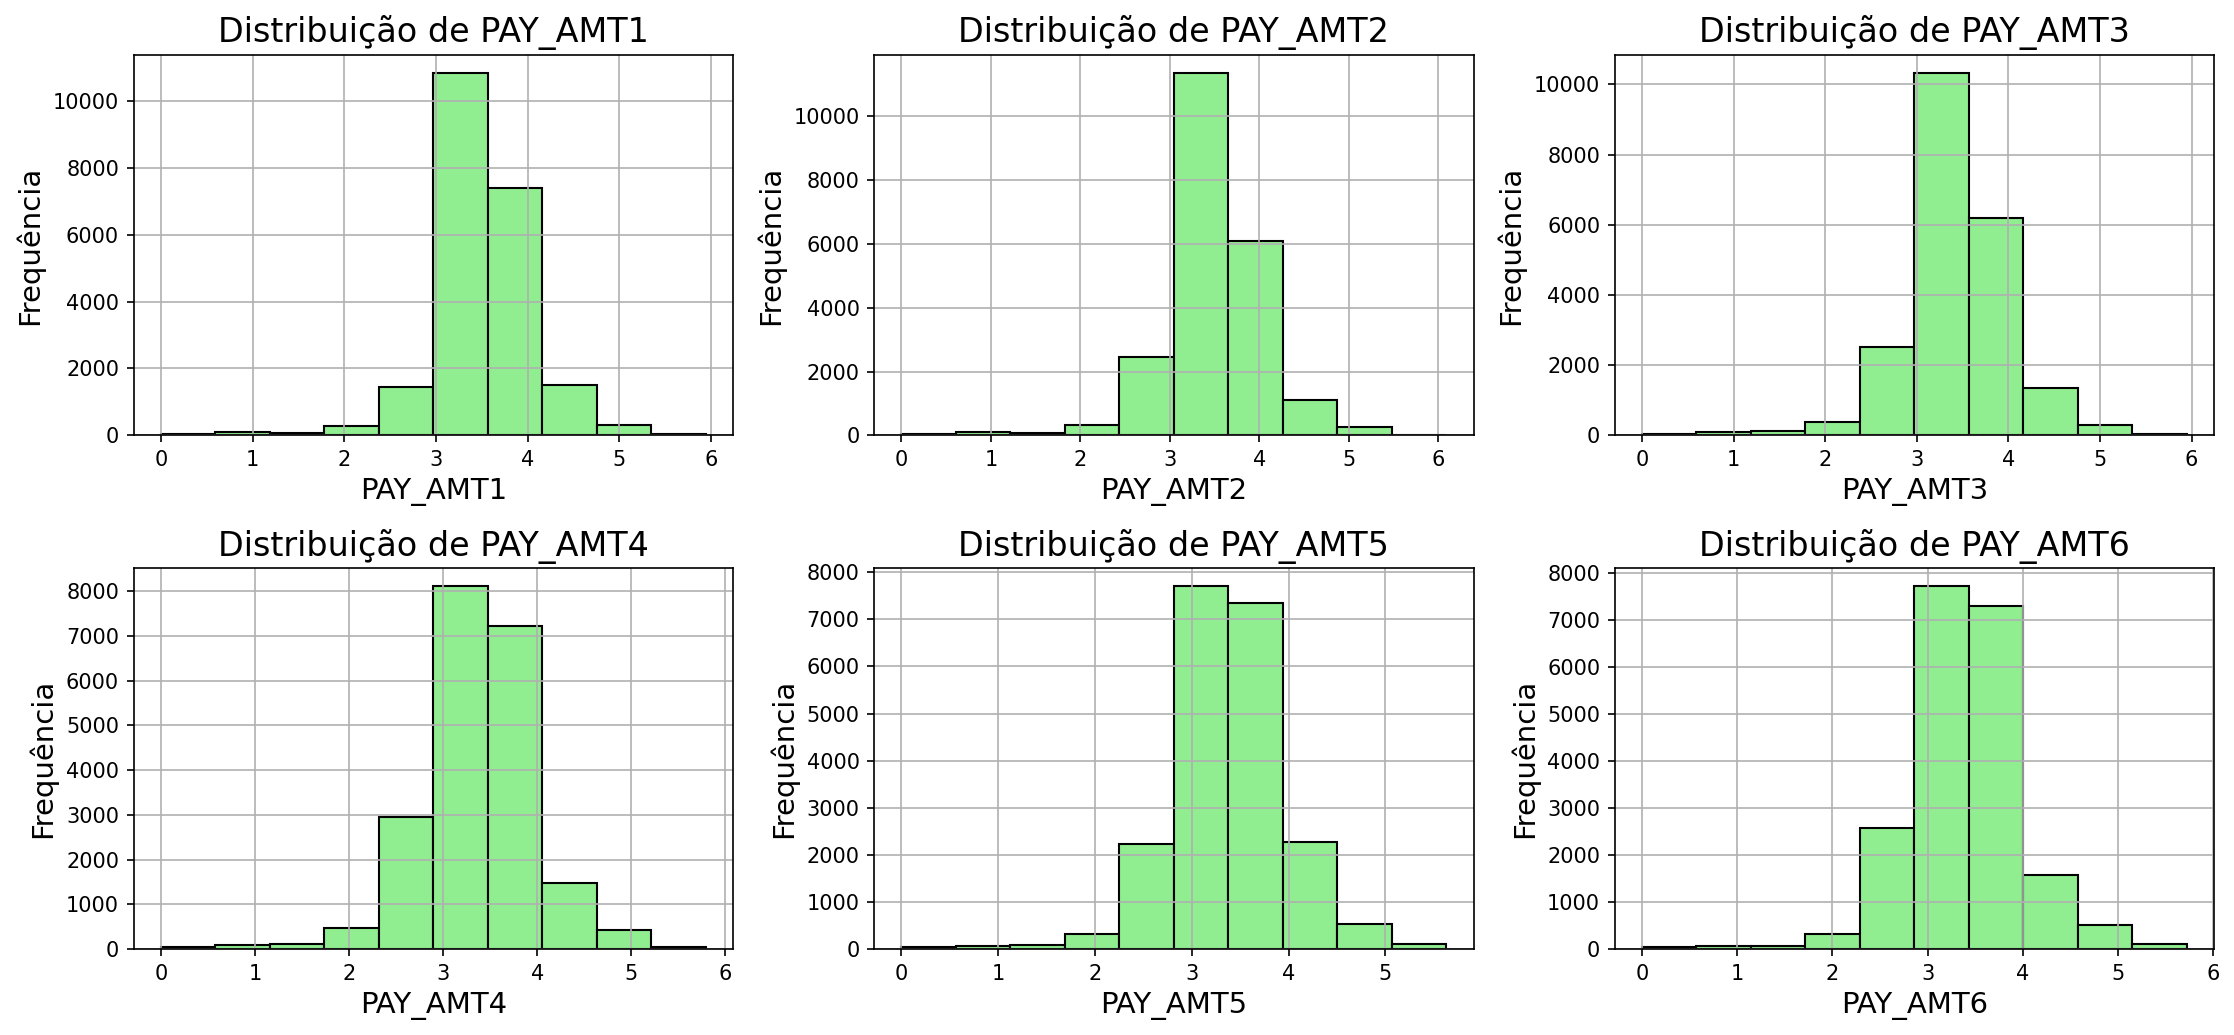

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))  # cria 2 linhas e 3 colunas de subplots

# lista com os nomes das colunas
pagamentos = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i, ax in enumerate(axs.ravel()):  # ravel irá aplainar o array axs para facilitar a iteração
    # aplicar log10 e criar o histograma
    pagamento_zero = (df[pagamentos[i]] == 0)
    df[pagamentos[i]][~pagamento_zero].apply(np.log10).hist(ax=ax, color='lightgreen', edgecolor='black')

    # adicionando títulos e rótulos
    ax.set_title('Distribuição de ' + pagamentos[i], fontsize=16)  # adiciona um título ao histograma
    ax.set_xlabel(pagamentos[i], fontsize=14)  # rótulo para o eixo X
    ax.set_ylabel('Frequência', fontsize=14)  # rótulo para o eixo Y

    # adicionando grid
    ax.grid(True)

    # desativa a notação científica
    ax.ticklabel_format(style='plain', axis='x', useOffset=False)


plt.tight_layout()  # ajusta o layout para evitar sobreposição
plt.show()  # exibe o plot



# 8. Criação do Modelo Preditivo

Para dar continuidade ao projeto, importarei algumas bibliotecas que serão de grande utilidade nos próximos passos

In [ ]:
import numpy as np
import sys
import matplotlib as mpl
import sklearn


Finalizado o tratamento dos dados, podemos importar nosso arquivo CSV contendo os dados limpos (dados_tratados.csv)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Portfólio/Projetos DS com Python/Projeto 1/dados_tratados.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,Ensino Médio,Graduação,Outros,Pós Graduação
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,Graduação,0,1,0,0
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,Graduação,0,1,0,0
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,Graduação,0,1,0,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,Graduação,0,1,0,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,Graduação,0,1,0,0


Podemos obser a média da variável "default payment next month", de forma a termos noção da distribuição de contas inadimplentes ou não no dataset

In [ ]:
df['default payment next month'].mean()

0.2217971797179718

O que, em resumo, significa que 22% da contas estão inadimplêntes, e cerca de 78% não estão.

In [ ]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Para a classificação das contas (inadimplente ou não inadimplente), trabalharei com um modelo de regressão Logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr =  LogisticRegression()
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Percebe-se que todos os parâmetros vem definidos por padrão dentro do pacote do scickit-learn, porém, de qualquer forma, é interessante que os parâmetros sejam explicitados.

In [ ]:
new_lr = LogisticRegression(C=1.0, class_weight=None,
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1, max_iter=100,
                            multi_class='warn',
                            n_jobs=None,
                            penalty='l2',
                            random_state=None,
                            solver='warn',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)


Os parâmetros continuam os mesmos, porém, agora temos mais liberdade para realizar ajustes e definir o que é mais interessante em cada caso.

Podemos alterar alguns hiperparâmetros da seguinte forma:


In [ ]:
new_lr.C = 0.1
new_lr.solver = 'liblinear'
new_lr.multi_class = 'auto'
print(new_lr.get_params())



{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Definindo as características e a variável resposta

In [ ]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X



array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [ ]:
y = df['default payment next month'][0:10].values
y


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Agora, é possível utilizar estes dados para ajustar nosso modelo de regressão logística através do método .fit

In [ ]:
new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

Com o modelo já treinado, podemos tentar avaliar dados que o modelo ainda não viu!!

In [ ]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X


array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [ ]:
new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Podemos visualizar também quais são os valores reais correspondentes a essas previsões

In [ ]:
df['default payment next month'][10:20].values


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Percebe-se que acertamos 80% das previsões, o que pode parecer bom, porém não acertamos nenhum valor 1, o que poderia ser um grande problema.

# 9 Métricas de desempenho do modelo para classificação binária

In [ ]:
# Dividindo o dataset em dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


Agora vou dar continuidade e adaptar um exemplo de modelo para exemplificar métricas de classificação binária. Vou manter a regressão logística com configurações quase básicas, escolhendo as mesmas que mostrei na etapa de Exploração e limpeza de dados.

In [ ]:
lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
lr.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Medindo a Acurácia do Modelo
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)


0.7834239639977498

Uma acurácia de 78% pode ser considerada bastante baixa, não sendo muito útil na prática. No entando, existem outras métricas melhores para avaliar um modelo de classificação binária.

A acurácia pode ser uma métrica enganosa em modelos de classificação binária em certas situações, especialmente quando estamos lidando com conjuntos de dados desbalanceados. Aqui estão algumas razões para isso:

1. **Erros não diferenciados**: A acurácia não diferencia impactos de falsos positivos e negativos; em saúde, diagnósticos errados variam em gravidade.

2. **Preferência por outras métricas**: Especialistas optam por precisão, recall, F1 e AUC-ROC para visões mais discriminativas do desempenho.

3. **Acurácia ignora incerteza**: Ela oferece visão binária, mas ignorar a probabilidade das previsões pode ocultar incertezas do modelo.

No caso de uma classificação binária, existem outras métricas que podem ser mais interessantes, como é o caso da **MATRIZ DE CONFUSÃO**.

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

É importante lembrar que na regressão logística, as previsões iniciais não são "sim" ou "não", mas sim probabilidades de 0 a 1. Essas probabilidades se tornam previsões "sim" ou "não" usando um limite (threshold). Se a probabilidade prevista estiver acima do limite (geralmente 0.5), é considerada "sim", caso contrário, é "não".

Podemos explorar as probabilidades estimadas ao investigar os métodos disponíveis no objeto de modelo de regressão logística que treinamos anteriormente. É importante recordar que após treinar o modelo, tínhamos a capacidade de realizar previsões binárias com base nos valores das características de novas amostras. Isso era feito ao utilizar o método **.predict** do modelo treinado, assumindo um limite de 0.5.

 No entanto, também temos a possibilidade de acessar as probabilidades estimadas diretamente para essas amostras, através da utilização do método .**predict_proba**.


In [ ]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

Percebe-se que a saída apresenta duas colunas, pois temos duas classes em nosso problema de classificação: positiva e negativa.

Considerando que rótulos negativos são representados por 0 e rótulos positivos por 1 (como em nossos dados), o scikit-learn apresenta a probabilidade associada à classe negativa na primeira coluna e a probabilidade associada à classe positiva na segunda coluna.

 Somando as probabilidades das duas classes para cada amostra, a soma resulta em 1, conforme explicado. Isso pode ser confirmado usando np.sum na primeira dimensão (colunas) para calcular a soma das probabilidades de cada amostra.

In [ ]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
prob_sum.shape

(5333,)

Ao aplicar o método .shape, percebe-se que o array possui as mesmas dimensões do array de rótulos de dados de teste, que é o formato esperado!

Sabe-se também que a soma de todas as probabilidaeds das classes negativa e positiva devem ser iguais a 1. Podemos verificar se o resultado está correto através da função np.unique()

In [ ]:
np.unique(prob_sum)

array([1.])

Depois de verificar nossa conclusão sobre as probabilidades estimadas, uma vez que a soma das probabilidades das categorias é igual a 1, só precisamos olhar para a segunda coluna. Lá encontraremos a probabilidade estimada para a classe positiva.

In [ ]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

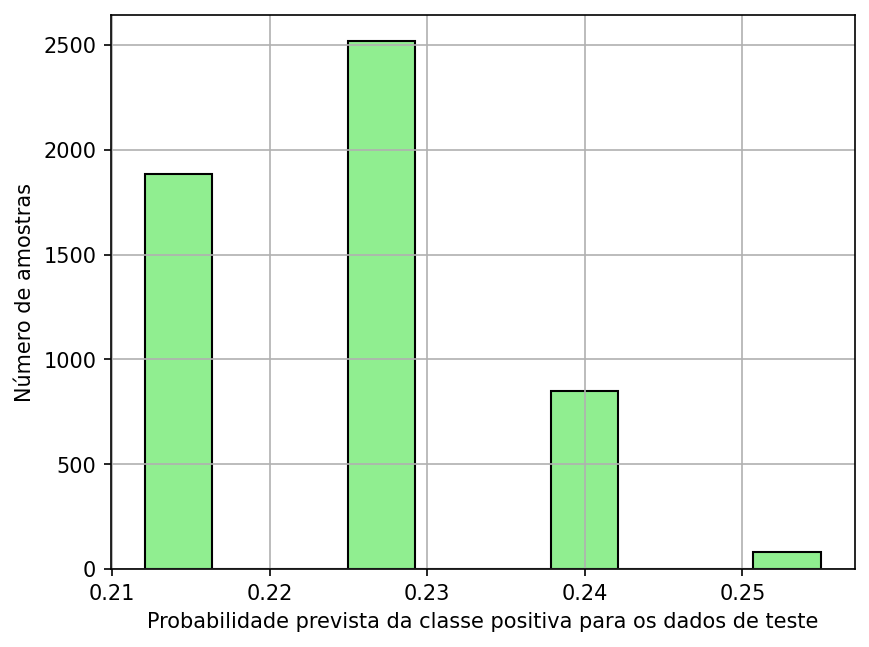

In [ ]:
mpl.rcParams['font.size'] = 10
plt.hist(pos_proba, color='lightgreen', edgecolor='black')
plt.xlabel('Probabilidade prevista da classe positiva para os dados de teste')
plt.ylabel('Número de amostras')
plt.grid()


O histograma de probabilidades apresenta quatro intervalos bem espaçados devido à característica "EDUCATION" possuir apenas quatro valores únicos no nosso exemplo de modelo. As probabilidades previstas estão todas abaixo de 0.5, o que resulta em classificações negativas com um limite de 0.5. No entanto, se o limite fosse reduzido para 0.25, as amostras do intervalo mais à direita seriam consideradas positivas.

Para entender melhor, podemos identificar as amostras com rótulos positivos e verificar se ajustar o limite para 0.25 melhoraria a classificação. Isso poderia ser feito visualmente com um histograma empilhado, semelhante ao anterior, mas com cores diferentes para amostras positivas e negativas.

Para realizar essa análise, primeiro precisaríamos separar as amostras positivas das negativas nas probabilidades previstas. Isso pode ser alcançado usando máscaras lógicas, onde identificaríamos amostras com rótulo positivo (y_test == 1) e amostras com rótulo negativo (y_test == 0).



In [ ]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Número de amostras')

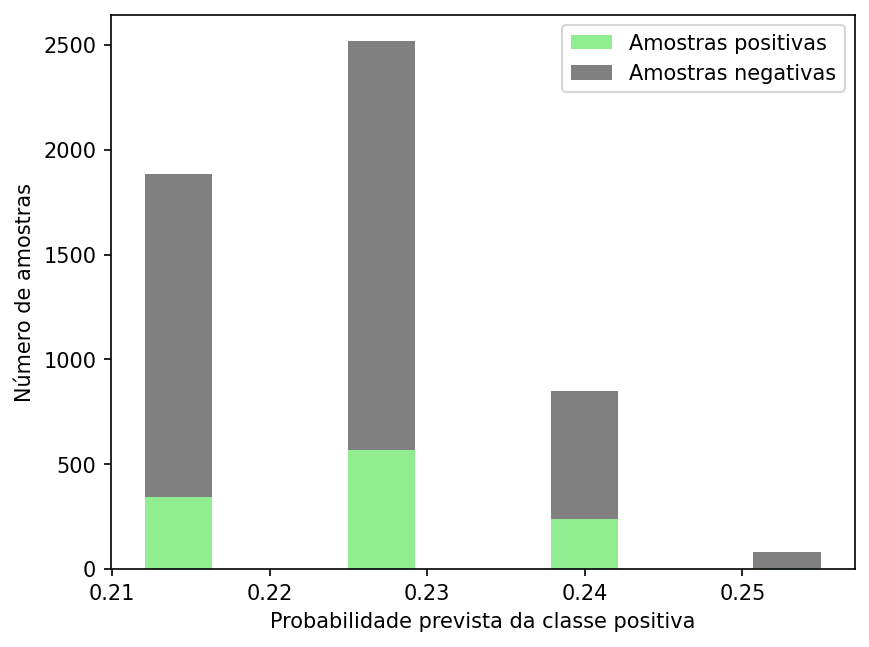

In [ ]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked', color=['lightgreen', 'grey'])
plt.legend(['Amostras positivas', 'Amostras negativas'])
plt.xlabel('Probabilidade prevista da classe positiva')
plt.ylabel('Número de amostras')


Na definição do limite de um classificador, buscamos um equilíbrio entre capturar verdadeiros positivos sem aumentar os falsos positivos. Reduzir o limite leva a mais de ambos os resultados. Um bom classificador maximiza verdadeiros positivos minimizando falsos positivos.

A curva ROC é uma visualização clássica em machine learning que ilustra essa dinâmica. Ela mostra a relação entre as taxas de verdadeiros positivos (eixo vertical) e falsos positivos (eixo horizontal) à medida que ajustamos o limite de 1 a 0. No ponto limite 1, não há previsões positivas, resultando em TPR e FPR de 0.

À medida que o limite diminui, TPR aumenta, esperançosamente superando a FPR. No limite 0, todas as amostras são previstas positivas, levando a TPR e FPR de 1. Entre esses extremos, escolher um limite depende das consequências de verdadeiros e falsos positivos/negativos para o problema. O scikit-learn oferece ferramentas para gerar as taxas de TPR e FPR ao variar o limite, permitindo criar a curva ROC completa para auxiliar na escolha do limite ideal.

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'Curva ROC')

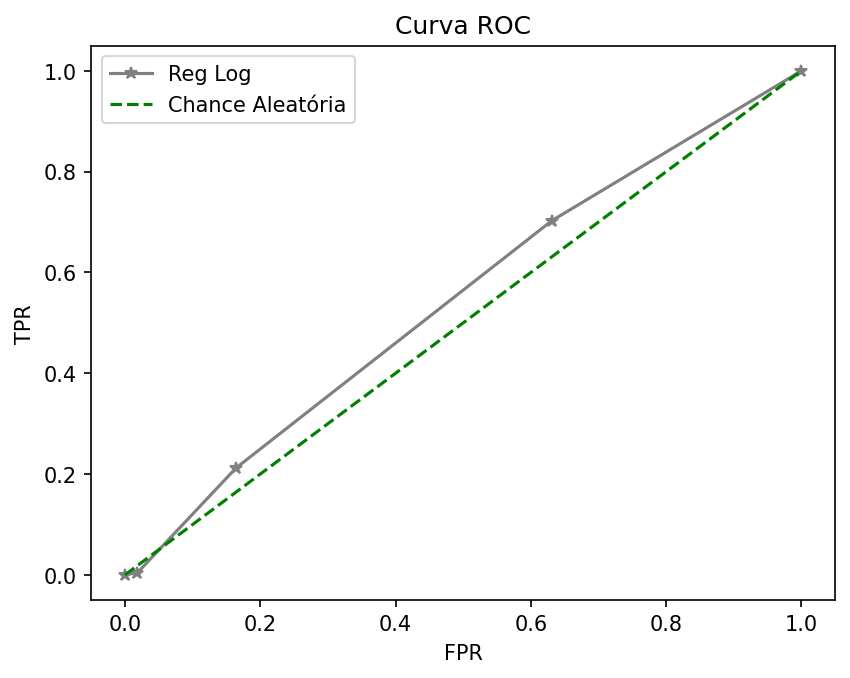

In [ ]:
plt.plot(fpr, tpr, '*-', color='gray')
plt.plot([0, 1], [0, 1], 'g--')
plt.legend(['Reg Log', 'Chance Aleatória'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')

Ao analisar a curva ROC, observamos seu início em (0,0), onde o limite é alto o suficiente para não ter classificações positivas. À medida que diminuímos o limite para cerca de 0.25, notamos um aumento maior na taxa de falsos positivos do que na taxa de verdadeiros positivos, conforme previsto. Conforme continuamos a reduzir o limite e incluímos mais barras do histograma empilhado como positivas, isso é refletido nos pontos seguintes da curva. O array de limites, embora não seja plotado, indica os valores correspondentes a esses pontos.

Podemos usar código a seguir para visualizar os limites usados na criação da curva ROC:

In [ ]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

Também podemos considerar em nossa análise qual seria a área sob a curva ROC (chamada de AUC - Area Under the Curve). Um classificador perfeito teria AUC 1, formando um quadrado unitário. Em contraste, a linha "Random chance" representa um classificador aleatório, com AUC 0.5, sendo metade da do classificador perfeito. A AUC geralmente varia entre 0.5 e 1. Valores próximos de 0.5 indicam desempenho aleatório, enquanto valores próximos de 1 indicam melhor desempenho. A AUC é uma métrica vital para avaliar classificadores em machine learning.

In [ ]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

A ROC AUC da regressão logística fica próxima de 0.5, indicando um classificador pouco eficaz. Isso é esperado, pois não refinamos as características do modelo. Estamos nos familiarizando com a sintaxe do ajuste de modelos e aprendendo a calcular métricas de qualidade usando um modelo simples com a característica EDUCATION. Planejamos obter uma ROC AUC maior ao considerar mais características no futuro.

# 10 Executando a Regrassão Logística com outra variáve#

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [ ]:
lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
y_test_2_pred_proba = lr.predict_proba(X_test_2)

In [ ]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [ ]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'Curva ROC para regressão logística com a característica LIMIT_BAL')

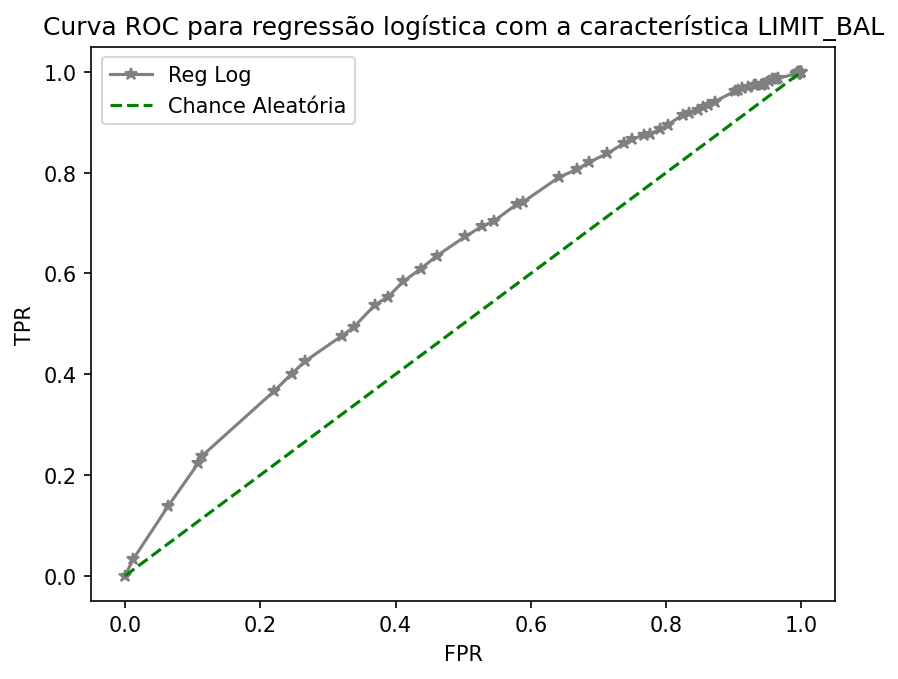

In [ ]:
plt.plot(fpr_2, tpr_2, '*-', color="gray")
plt.plot([0, 1], [0, 1], 'g--')
plt.legend(['Reg Log', 'Chance Aleatória'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC para regressão logística com a característica LIMIT_BAL')

A análise da curva ROC aponta para um modelo mais promissor em comparação com um modelo básico que considera somente a variável "EDUCATION".

 A curva do modelo em questão está notavelmente afastada da linha que representa um classificador aleatório, indicando melhor desempenho.
 Além disso, a suavidade nas mudanças das taxas de verdadeiros e falsos positivos ao longo dos limites de decisão reflete a influência da característica "LIMIT_BAL", que possui uma variedade mais ampla de valores.

  Isso reforça a robustez do modelo diante de diferentes situações e destaca a importância da análise cuidadosa da curva ROC na tomada de decisões em projetos de ciência de dados.

# 11 Avaliando a relação entre Precision e Recall

Depois de avaliar a curva ROC e a métrica ROC AUC, surge a necessidade de entender melhor a relação entre as métricas Precision e Recall em um modelo de classificação.

A precisão é uma métrica de avaliação em problemas de classificação que mede a proporção de instâncias positivas corretamente classificadas em relação ao total de instâncias que o modelo classificou como positivas. Em termos simples, a precisão responde à pergunta: "Das instâncias que o modelo afirmou serem positivas, quantas realmente eram positivas?".

Já o recall, também conhecido como taxa de verdadeiros positivos, é uma métrica de avaliação em problemas de classificação que mede a proporção de instâncias positivas corretamente classificadas em relação ao total de instâncias positivas reais. Em outras palavras, o recall responde à pergunta: "Das instâncias positivas reais, quantas o modelo conseguiu identificar corretamente?"

Para calcular a curva precision-recall, usamos diferentes limiares de decisão para a classificação. Cada limiar define quando um exemplo é considerado positivo ou negativo. Com isso, obtemos valores de precisão e recall para cada limiar, permitindo observar como eles variam conforme o limite muda. Isso ajuda a entender o trade-off entre essas métricas.

In [ ]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

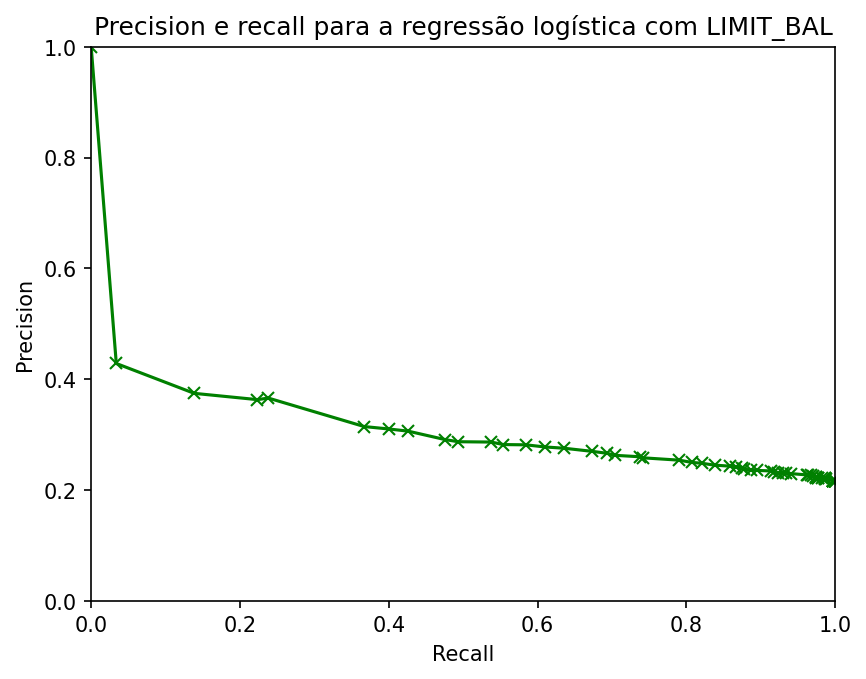

In [ ]:
plt.plot(recall, precision, '-x', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision e recall para a regressão logística com LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

Podemos ir além e calcular a área sob a curva precision-recall (AUC). Essa métrica oferece uma visão resumida da qualidade geral do modelo em termos de precisão e recall. A AUC é calculada usando a regra trapezoidal, que considera a área sob a curva precision-recall. Comparar essa área com a de outros modelos ou conjuntos de características nos ajuda a tomar decisões sobre qual abordagem seguir.

In [ ]:
metrics.auc(recall, precision)

0.31566964427378624

Observamos que a curva precision-recall indica consistentemente baixa precisão para este modelo, com a precisão das classificações positivas corretas sendo inferior a 50% na maioria dos limites.

# 12 Recalculando a ROC AUC com os dados de treinamento

In [ ]:
y_train_2_pred_proba = lr.predict_proba(X_train_2)

In [ ]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344

Ao recalcular a área abaixo da curva ROC usando dados de treino, meu objetivo foi entender como o modelo se comporta ao ajustar-se aos mesmos dados que foram usados para o treinamento. A saída nos retorna uma AUC em torno de 0.62. Este valor é muito próximo à AUC calculada anteriormente para os dados de teste  analisados. Essa equivalência quantitativa sugere uma coerência no desempenho do modelo em ambos os conjuntos de dados, indicando que o modelo se comporta de forma satisfatória tanto com dados usados em seu treinamento quanto com dados fora da amostra!!

# Conclusões

Modelos de classificação como a regressão logísticas, podendem ser bastante útieis para empresas do segmento financeiro, permitindo uma tomada de decisão mais eficiente e minimizando prejuízos por inadimplência.
Na prática, poderiamos aplicar este modelo em diversos cenários, como:


 - **REDUÇÃO DE RISCOS**

 Um modelo como este seria bastante útil em empresas que oferecem cartões de crédito, servindo como uma triagem inicial para identificar contas com alto risco de inadimplência.

 - **PERSONAIZAÇÃO DE OFERTAS**

 Através da anáise do risco de inadimplência, poderiam ser oferecidos serviços personalizados para clientes específicos. Por exemplo, contas consideradas pelo modelo com baixo risco de inadimplência, poderiam receber mehores ofertas de produtos financeiros, como condições de empréstimo mais interessantes, ou até mesmo um maior imite de cartão de crédito.

- **EFICIÊNCIA OPERACIONAL**

 A adoção de um bom modelo de classificação pode melhorar de forma significativa a eficiência operacional do negócio, reduzindo o tempo e o esforço gastos com uma análise manual de contas, o que poderia liberar recursos para o desenvolvimento de outras áreas relevantes, como atendimento ao cliente ou desenvovimento de novos produtos.





# Limitações identificadas

- Os dados fornecidos para a variável "PAY_1" parecem pouco consistentes, sendo que apenas o primeiro mês são representativos para previsões futuras.

- A métrica ROC AUC observada está próxima de 0,5, o que sugere um classificador pouco eficiente, o que indica que o modelo poderia não performar da maneira desejada em uma aplicação real.


# Próximos passos

 - **REFINAMENTO DAS VARIÁVEIS**

 Durante a fase de desenvolvimento e avaliação do modelo de previsão de inadimplência, ficou claro que a  seleção e o tratamento das variáveis têm um impacto significativo no desempenho do modelo. Inicilmente, foquei na variável "EDUCATION" para treinamento. Porémo, a análise sugere que o desempenho do modelo poderia ser melhorado através de uma seleção mais criteriosa das variáveis utilizadas.

- **ENGENHARIA DE VARIÁVEIS**

 A criação de novas variáveisS derivadas das já existentes ou mesmo a criação de interações entre elas pode enriquecer o conjunto de dados, possibilitando que o modelo identifique relações mais complexas. Por exemplo, a combinação de idade e renda pode criar uma nova característica que represente o risco financeiro de forma mais precisa.

- **APRIMORAMENTO NA SELEÇÃO DAS VARIÁVEIS**

 Ao invés de utilizar todas as variáveis disponíveis, uma abordagem mais criteriosa poderia ser realizada para identificar e manter apenas as variáveis que mais contribuem para a previsão. Técnicas como importância de variáveis baseada em árvore ou até mesmo métodos de regularização poderiam ser utilizados para este fim.